In [395]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from sklearn.utils import shuffle
import pandas as pd
import time
import sklearn.metrics
import seaborn as sns
%matplotlib inline

In [396]:
df = pd.read_csv('train.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [397]:
categorical_cols = [cname for cname in df.columns if df[cname].dtype not in ['int64', 'float64']]
df.drop(categorical_cols, axis=1,inplace = True)
df.drop(['LotFrontage','GarageYrBlt', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1,inplace = True)

In [398]:
df.dropna(inplace=True)
y = df['SalePrice'].to_numpy().reshape(-1, 1)
X = df.drop('SalePrice', axis=1)

In [399]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [400]:
X.shape, y.shape

((1452, 31), (1452, 1))

# Functions

In [401]:
# GRADED FUNCTION: initialize_with_zeros
def initialize_parameters_with_zeros(dim):
    
    thetas = np.zeros((dim,1))
    bias = 0.0
    
    return thetas, bias

def initialize_vt_mt_with_zeros(dim):
    
    mt, vt = np.zeros((dim,1)), np.zeros((dim,1))
    mt_bais, vt_bais = 0.0, 0.0
    
    return mt, vt, mt_bais, vt_bais

In [422]:
def gb_multi(X, y, learning_rate, epoch):
    
    error=[]    #list of cost function for every iteration
    theta_vector, bias = initialize_parameters_with_zeros(X.shape[1])
    m = X.shape[0]  
    for i in range(epoch): 
        
        if len(error) > 2:
            if np.abs(error[-2] - error[-1]) < 0.001:
                return error
        
        h = np.dot(X, theta_vector)+ bias# hypothesis fuction
        e = h-y #error 
        j= 1/(2*m)*np.sum((h-y)**2) #calculating the cost fuction 

        r2_score = sklearn.metrics.r2_score(y,h) #calculating r2 score for every epoch
        print(r2_score)
        print("cost function= "+str(j),"r2_score= "+str(r2_score),sep="\n")
        print("iter no.= "+ str(i))
        
        
        #Update the parameters (simultaneously)
        dthetas = 1/(m)*np.dot(X.T, e)
        dbias = 1/(m)*np.sum(e)
        
        theta_vector = theta_vector - (learning_rate*dthetas)
        bias = bias - (learning_rate*dbias)
        
        error.append(j)

    return error

In [403]:
error = gb_multi(X, y, 0.05, 200)

-5.193009850226498
cost function= 19451834432.321625
r2_score= -5.193009850226498
iter no.= 0
-4.302300664713088
cost function= 16654175777.972605
r2_score= -4.302300664713088
iter no.= 1
-3.6570423067327384
cost function= 14627461942.688389
r2_score= -3.6570423067327384
iter no.= 2
-3.151239065263156
cost function= 13038767407.019585
r2_score= -3.151239065263156
iter no.= 3
-2.7317394278786367
cost function= 11721146785.033298
r2_score= -2.7317394278786367
iter no.= 4
-2.371047955946632
cost function= 10588238722.095997
r2_score= -2.371047955946632
iter no.= 5
-2.054215015884336
cost function= 9593087407.65524
r2_score= -2.054215015884336
iter no.= 6
-1.7725049586651083
cost function= 8708254745.75533
r2_score= -1.7725049586651083
iter no.= 7
-1.5203293996661822
cost function= 7916187989.823097
r2_score= -1.5203293996661822
iter no.= 8
-1.293754338775277
cost function= 7204530705.638107
r2_score= -1.293754338775277
iter no.= 9
-1.0897668095307869
cost function= 6563819364.774169
r2_sc

In [425]:
def adam_gb_multi(X, y, learning_rate, epoch, epsilon, beta_1, beta_2):
    
    error=[]    #list of cost function for every iteration
    theta_vector, bias = initialize_parameters_with_zeros(X.shape[1])
    mt_vector, vt_vector, mt_bais, vt_bais = initialize_vt_mt_with_zeros(X.shape[1])
    m = X.shape[0]  
    for i in range(epoch): 
        
        if len(error) > 2:
            if np.abs(error[-2] - error[-1]) < 0.001:
                return error
        
        h = np.dot(X, theta_vector)+ bias# hypothesis fuction
        e = h-y #error 
        j= 1/(2*m)*np.sum((h-y)**2) #calculating the cost fuction 

        r2_score = sklearn.metrics.r2_score(y,h) #calculating r2 score for every epoch
        print("cost function= "+str(j),"r2_score= "+str(r2_score),sep="\n")
        print("iter no.= "+ str(i))
        
        
        #Update the parameters (simultaneously)                                                                      
        # theta 1                                                                                                                                                                
     # bais
        dbais = (1/m)*np.sum(e)
        
        mt_bais = (beta_1*mt_bais) + ((1-beta_1)*dbais)
        mt_hat_bais = mt_bais/(1-(beta_1**(i+1)))
        
        vt_bais = (beta_2*vt_bais) +((1-beta_2)*(dbais**2))
        vt_hat_bais = vt_bais/(1-(beta_2**(i+1)))
                                             
        # theta 1               
        dthetas = 1/(m)*np.dot(X.T, e)
                                                     
        mt_vector = (beta_1*mt_vector) + ((1-beta_1)*dthetas)
        mt_hat_vector = mt_vector/(1-(beta_1**(i+1)))
                                             
        vt_vector = (beta_2*vt_vector) + ((1-beta_2)*(dthetas**2))
        vt_hat_vector = vt_vector/(1-(beta_2**(i+1)))
                                             
        bias = bias - (learning_rate*mt_hat_bais/(np.sqrt(vt_hat_bais) + epsilon))
        theta_vector = theta_vector - (learning_rate*mt_hat_vector/(np.sqrt(vt_hat_vector) + epsilon))
        
        
        error.append(j)

    return error

In [410]:
df= pd.read_csv('MultipleLR.csv')
x=df
y=df['y']
x.drop('y', inplace=True, axis=1)
x = np.array(x)
y = np.array(y).reshape(25,1)

In [426]:
y.shape

(25, 1)

In [455]:
learning_rate = 0.003
epoch = 300
epsilon = 1e-8
beta_2= 0.7
beta_1= 0.7
error = adam_gb_multi(x, y, learning_rate, epoch, epsilon, beta_1, beta_2)

cost function= 13405.98
r2_score= -47.30997710984392
iter no.= 0
cost function= 13286.69031522012
r2_score= -46.880103132622075
iter no.= 1
cost function= 13167.934267965853
r2_score= -46.4521521790544
iter no.= 2
cost function= 13049.712025832965
r2_score= -46.026124853091346
iter no.= 3
cost function= 12932.023725179799
r2_score= -45.60202164611574
iter no.= 4
cost function= 12814.86946488466
r2_score= -45.179842914446816
iter no.= 5
cost function= 12698.24930443361
r2_score= -44.7595888724494
iter no.= 6
cost function= 12582.163265918678
r2_score= -44.34125959973462
iter no.= 7
cost function= 12466.611338989935
r2_score= -43.924855059005345
iter no.= 8
cost function= 12351.59348756899
r2_score= -43.510375120248966
iter no.= 9
cost function= 12237.109657170959
r2_score= -43.09781958712299
iter no.= 10
cost function= 12123.159781909486
r2_score= -42.68718822219843
iter no.= 11
cost function= 12009.743790568906
r2_score= -42.27848076884152
iter no.= 12
cost function= 11896.86161143235


(Text(0, 0.5, 'cost_function(j)'),)

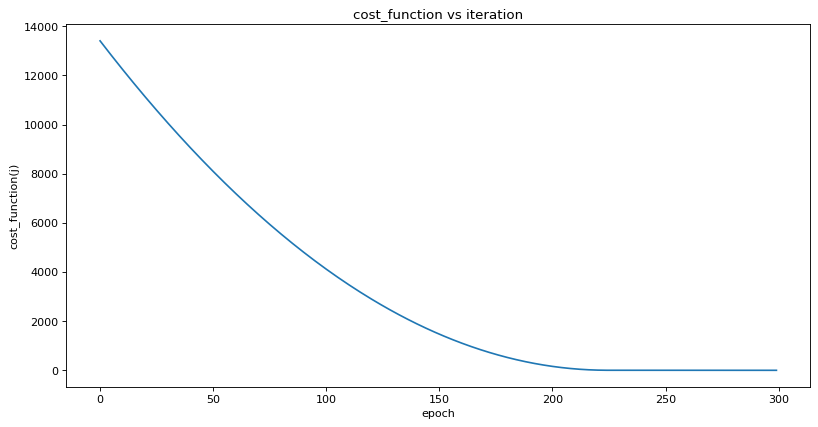

In [456]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(error)
plt.title("cost_function vs iteration")
plt.xlabel("epoch")
plt.ylabel("cost_function(j)"),

In [514]:
def adam_mini_multi(X, y, learning_rate, epoch, epsilon, beta_1, beta_2, miniBatch):
    
    error=[]    #list of cost function for every iteration
    theta_vector, bias = initialize_parameters_with_zeros(X.shape[1])
    mt_vector, vt_vector, mt_bais, vt_bais = initialize_vt_mt_with_zeros(X.shape[1])
    baises = []
    m = int(X.shape[0]  / miniBatch)
    for k in range(epoch):
        n=m
        for i in range(miniBatch): 

            if len(error) > 2:
                if np.abs(error[-2] - error[-1]) < 0.001:
                    return error

            h = np.dot(X[(n-m):n], theta_vector)+ bias# hypothesis fuction
            e = h-y[(n-m):n] #error 
            j= 1/(2*m)*np.sum(e**2) #calculating the cost fuction 
            r2_score = sklearn.metrics.r2_score(y[(n-m):n],h) #calculating r2 score for every epoch
            print("cost function= "+str(j),"r2_score= "+str(r2_score),sep="\n")
            print("iter no.= "+ str(i))


            #Update the parameters (simultaneously)                                                                      
            # theta 1                                                                                                                                                                
         # bais
            dbais = (1/m)*np.sum(e)

            mt_bais = (beta_1*mt_bais) + ((1-beta_1)*dbais)
            mt_hat_bais = mt_bais/(1-(beta_1**(i+1)))

            vt_bais = (beta_2*vt_bais) +((1-beta_2)*(dbais**2))
            vt_hat_bais = vt_bais/(1-(beta_2**(i+1)))

            # theta 1               
            dthetas = 1/(m)*np.dot(X.T[:,(n-m):n], e)

            mt_vector = (beta_1*mt_vector) + ((1-beta_1)*dthetas)
            mt_hat_vector = mt_vector/(1-(beta_1**(i+1)))

            vt_vector = (beta_2*vt_vector) + ((1-beta_2)*(dthetas**2))
            vt_hat_vector = vt_vector/(1-(beta_2**(i+1)))

            bias = bias - (learning_rate*mt_hat_bais/(np.sqrt(vt_hat_bais) + epsilon))
            theta_vector = theta_vector - (learning_rate*mt_hat_vector/(np.sqrt(vt_hat_vector) + epsilon))


            error.append(j)
            baises.append(bias)
    return error, baises

In [515]:
df= pd.read_csv('MultipleLR.csv')
x=df
y=df['y']
x.drop('y', inplace=True, axis=1)
x = np.array(x)
y = np.array(y).reshape(25,1)

In [516]:
learning_rate = 0.03
epoch = 10
epsilon = 1e-8
beta_2= 0.7
beta_1= 0.7
miniBatch=4

error, biases = adam_mini_multi(x, y, learning_rate, epoch, epsilon, beta_1, beta_2, miniBatch)

cost function= 13209.166666666666
r2_score= -24.61846783751751
iter no.= 0
cost function= 12047.125941667811
r2_score= -22.364752391985846
iter no.= 1
cost function= 10938.863616771534
r2_score= -20.215337259119455
iter no.= 2
cost function= 9884.535994610984
r2_score= -18.170525579463174
iter no.= 3
cost function= 8884.267381315436
r2_score= -16.230558438064634
iter no.= 0
cost function= 7338.22732514683
r2_score= -13.232096956431736
iter no.= 1
cost function= 6223.9285432614815
r2_score= -11.07097444011493
iter no.= 2
cost function= 5303.391583653904
r2_score= -9.285642549915986
iter no.= 3
cost function= 4505.620791214506
r2_score= -7.73840903370985
iter no.= 0
cost function= 3363.605410158694
r2_score= -5.523531664999084
iter no.= 1
cost function= 2600.8212536480046
r2_score= -4.044152846208823
iter no.= 2
cost function= 2011.908145690787
r2_score= -2.9019875684122582
iter no.= 3
cost function= 1534.6160484861302
r2_score= -1.9763052335686182
iter no.= 0
cost function= 912.24956804

(Text(0, 0.5, 'cost_function(j)'),)

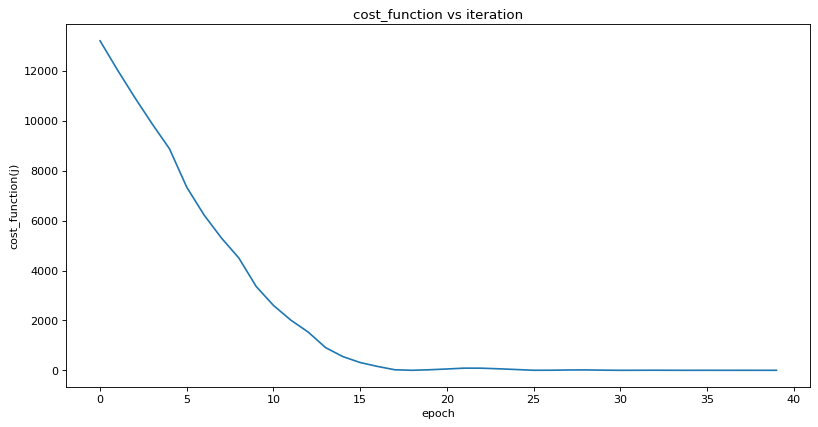

In [506]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(error)
plt.title("cost_function vs iteration")
plt.xlabel("epoch")
plt.ylabel("cost_function(j)"),

(Text(0, 0.5, 'cost_function(j)'),)

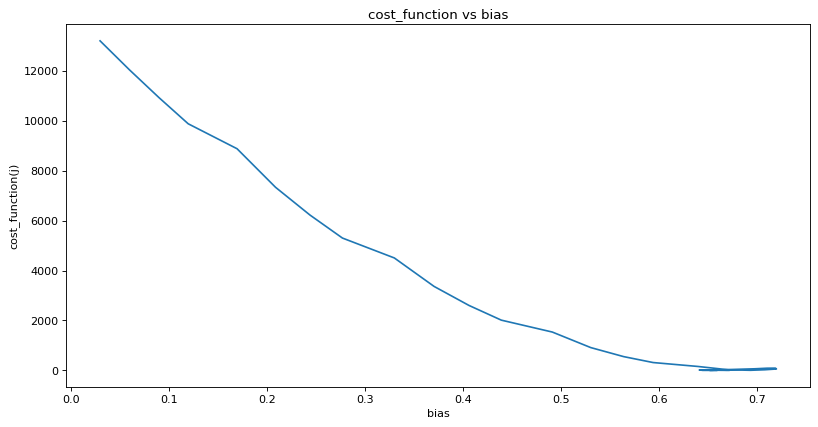

In [520]:

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(biases, error)
plt.title("cost_function vs bias")
plt.xlabel("bias")
plt.ylabel("cost_function(j)"),

In [178]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [155]:
model = smf.ols(formula = 'SalePrice ~MSSubClass+ LotArea+ OverallQual+ OverallCond+ MasVnrArea+\
       BsmtFinSF1+ BsmtFinSF2+ BsmtUnfSF+ TotalBsmtSF+\
        LowQualFinSF+ GrLivArea+ BsmtFullBath+ BsmtHalfBath+\
       FullBath+ HalfBath+ BedroomAbvGr+ KitchenAbvGr+ TotRmsAbvGrd+\
       Fireplaces+GarageCars+ GarageArea+ WoodDeckSF+ OpenPorchSF+\
       EnclosedPorch+ ScreenPorch+ PoolArea+ MiscVal+\
       MoSold', data=df).fit()

In [156]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     217.9
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:18:14   Log-Likelihood:                -17252.
No. Observations:                1452   AIC:                         3.456e+04
Df Residuals:                    1424   BIC:                         3.471e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.057e+04   9617.141     -7.338      0.000   -8.94e+04   -5.17e+04
MSSubClass     -167.4024     25.904     -6.462      0.000    -218.216    -116.589
LotArea           0.3618      0.102      3.542      0.000       0.161       0.562
OverallQual    2.024e+04   1131.981     17.878      0.000     1.8e+04    2.25e+04
OverallCond    3079.3032    892.655      3.450      0.001    1328.244    4830.362
MasVnrArea       32.6798      6.019      5.430      0.000      20.873      44.486
BsmtFinSF1       10.8001      2.483      4.349      0.000       5.929      15.671
BsmtFinSF2       -1.3624      4.484     -0.304      0.761     -10.159       7.434
BsmtUnfSF         1.7968      2.383      0.754      0.451      -2.877       6.471
TotalBsmtSF      11.2344      2.749      4.087      0.000       5.843      16.626
LowQualFinSF    -29.6474     20.015     -1.481      0.139     -68.909       9.614
GrLivArea        39.6483      4.456      8.898      0.000      30.908      48.389
BsmtFullBath   1.213e+04   2621.898      4.627      0.000    6988.705    1.73e+04
BsmtHalfBath   3972.5396   4142.189      0.959      0.338   -4152.908    1.21e+04
FullBath       1.339e+04   2578.033      5.193      0.000    8330.208    1.84e+04
HalfBath       3375.2851   2348.654      1.437      0.151   -1231.907    7982.477
BedroomAbvGr  -1.104e+04   1682.588     -6.561      0.000   -1.43e+04   -7738.478
KitchenAbvGr  -1.773e+04   5133.307     -3.453      0.001   -2.78e+04   -7658.102
TotRmsAbvGrd   4856.8377   1254.434      3.872      0.000    2396.100    7317.576
Fireplaces     2449.5072   1764.411      1.388      0.165   -1011.616    5910.631
GarageCars     1.323e+04   2880.618      4.593      0.000    7580.945    1.89e+04
GarageArea       -0.4368      9.852     -0.044      0.965     -19.762      18.889
WoodDeckSF       28.5412      8.073      3.535      0.000      12.704      44.378
OpenPorchSF      -2.6564     15.413     -0.172      0.863     -32.890      27.577
EnclosedPorch   -26.4490     16.092     -1.644      0.100     -58.016       5.117
ScreenPorch      41.1158     17.336      2.372      0.018       7.109      75.122
PoolArea        -26.5911     23.919     -1.112      0.266     -73.512      20.330
MiscVal          -0.2119      1.883     -0.113      0.910      -3.906       3.482
MoSold          -97.6460    348.095     -0.281      0.779    -780.480     585.188
==============================================================================
Omnibus:                      575.448   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82060.495
Skew:                          -0.764   Prob(JB):                         0.00
Kurtosis:                      39.797   Cond. No.                     1.36e+16
================================================================